# <center> Assignment 2 </center>

#### Name: Janelle Tait

#### Student ID: 180447860

You are given a training set and the description of the features. Please implement the following requirements. You can use the sklearn or other python packages. 

Ref: https://scikit-learn.org/stable/modules/tree.html

Submit the ipynb file ONLY.

### Question 1. The data set has missing values shown as "?". Please show the percentage of missing values for each feature, and the handling strategies  (i.e.  use median to impute continuous features, and mode to impute categorical featues).

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics


headers = ['Gender', 'Symptoms', 'Alcohol', 'Hepatitis B Surface Antigen', 'Hepatitis B e Antigen', 'Hepatitis B Core Antibody', 'Hepatitis C Virus Antibody', 'Cirrhosis ', 'Endemic Countries', 'Smoking', 'Diabetes', 'Obesity', 'Hemochromatosis', 'Arterial Hypertension', 'Chronic Renal Insufficiency', 'Human Immunodeficiency Virus', 'Nonalcoholic Steatohepatitis', 'Esophageal Varices', 'Splenomegaly', 'Portal Hypertension', 'Portal Vein Thrombosis', 'Liver Metastasis', 'Radiological Hallmark', 'Age at diagnosis', 'Grams of Alcohol per day', 'Packs of cigarets per year', 'Performance Status', 'Encefalopathy degree', 'Ascites degree', 'International Normalised Ratio', 'Alpha-Fetoprotein (ng/mL)', 'Haemoglobin (g/dL)', 'Mean Corpuscular Volume (fl)', 'Leukocytes(G/L)', 'Platelets (G/L)', 'Albumin (mg/dL)', 'Total Bilirubin(mg/dL)', 'Alanine transaminase (U/L)', 'Aspartate transaminase (U/L)', 'Gamma glutamyl transferase (U/L)', 'Alkaline phosphatase (U/L)', 'Total Proteins (g/dL)', 'Creatinine (mg/dL)', 'Number of Nodules', 'Major dimension of nodule (cm)', 'Direct Bilirubin (mg/dL)', 'Iron (mcg/dL)', 'Oxygen Saturation (%)', 'Ferritin (ng/mL)', 'Class (1 if patient survives, 0 if patient died)']
data_types = ['nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'integer', 'continuous', 'continuous', 'ordinal', 'ordinal', 'ordinal', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'integer', 'continuous', 'continuous', 'continuous', 'continuous', 'continuous', 'nominal']

#def read_attribute_info(filename):
    #file = open(filename, "r")
    #s = file.read()
    #lines = s.split('\n')
    #print(lines)
    #for line in lines:
        #pieces = line.split(':')
        #headers.append(pieces[0])
        #print("pieces[0] = ")
        #print(pieces[0])
        #pieces[1] = pieces[1].strip()
        #data_types.append(pieces[1])
        #print("pieces[1] = ")
        #print(pieces[1])
        
    #return headers, data_types
        

#headers, data_types = read_attribute_info("attribute_info.txt")
#print(headers)
#print(data_types)

#each line in train is a record, and attributes are separated by commas
#to get the percentage of missing values for each feature, we will count the number of ? each feature has then divide by 165 and multiply by 100 to get the percent

missing_value_counter = [0 for i in range(50)]

#make 2d array of record info
record_info = [['' for i in range(50)] for i in range(165)]

file = open("train.txt")
s = file.read()
records = s.split('\n')
for i in range(165):
    elements = records[i].split(',')
    for j in range(50):
        record_info[i][j] = elements[j]
        
#for i in range(len(record_info)):
    #print("record: ".format(i))
    #print(record_info[i])
    
missing_value_counts = [0 for i in range(50)]
missing_value_percentages = [0 for i in range(50)]
for i in range(165):
    for j in range(50):
        if(record_info[i][j] == '?'):
            missing_value_counts[j] += 1
            
handling_strategy = ['' for i in range(50)]
            
for i in range(50):
    percent = (missing_value_counts[i]/165)*100
    rounded = round(percent, 2)
    missing_value_percentages[i] = rounded
    if(data_types[i] == "integer" or data_types[i] == "continuous"):
        handling_strategy[i] = "median"
        
    else:
        handling_strategy[i] = "mode"
    print("feature: {:<50}missing value percentage: {:<10}handling strategy: {}".format(headers[i], missing_value_percentages[i], handling_strategy[i]))
    
#print("missing value percentages: ")
#print(missing_value_percentages)

#continuous features: integer, continuous
#categorical features: nomial, ordinal
    

feature: Gender                                            missing value percentage: 0.0       handling strategy: mode
feature: Symptoms                                          missing value percentage: 10.91     handling strategy: mode
feature: Alcohol                                           missing value percentage: 0.0       handling strategy: mode
feature: Hepatitis B Surface Antigen                       missing value percentage: 10.3      handling strategy: mode
feature: Hepatitis B e Antigen                             missing value percentage: 23.64     handling strategy: mode
feature: Hepatitis B Core Antibody                         missing value percentage: 14.55     handling strategy: mode
feature: Hepatitis C Virus Antibody                        missing value percentage: 5.45      handling strategy: mode
feature: Cirrhosis                                         missing value percentage: 0.0       handling strategy: mode
feature: Endemic Countries                      

### Question 2. Impute the missing values, and use the data to train an ID3 decision tree using information gain. Please show the tree structure.

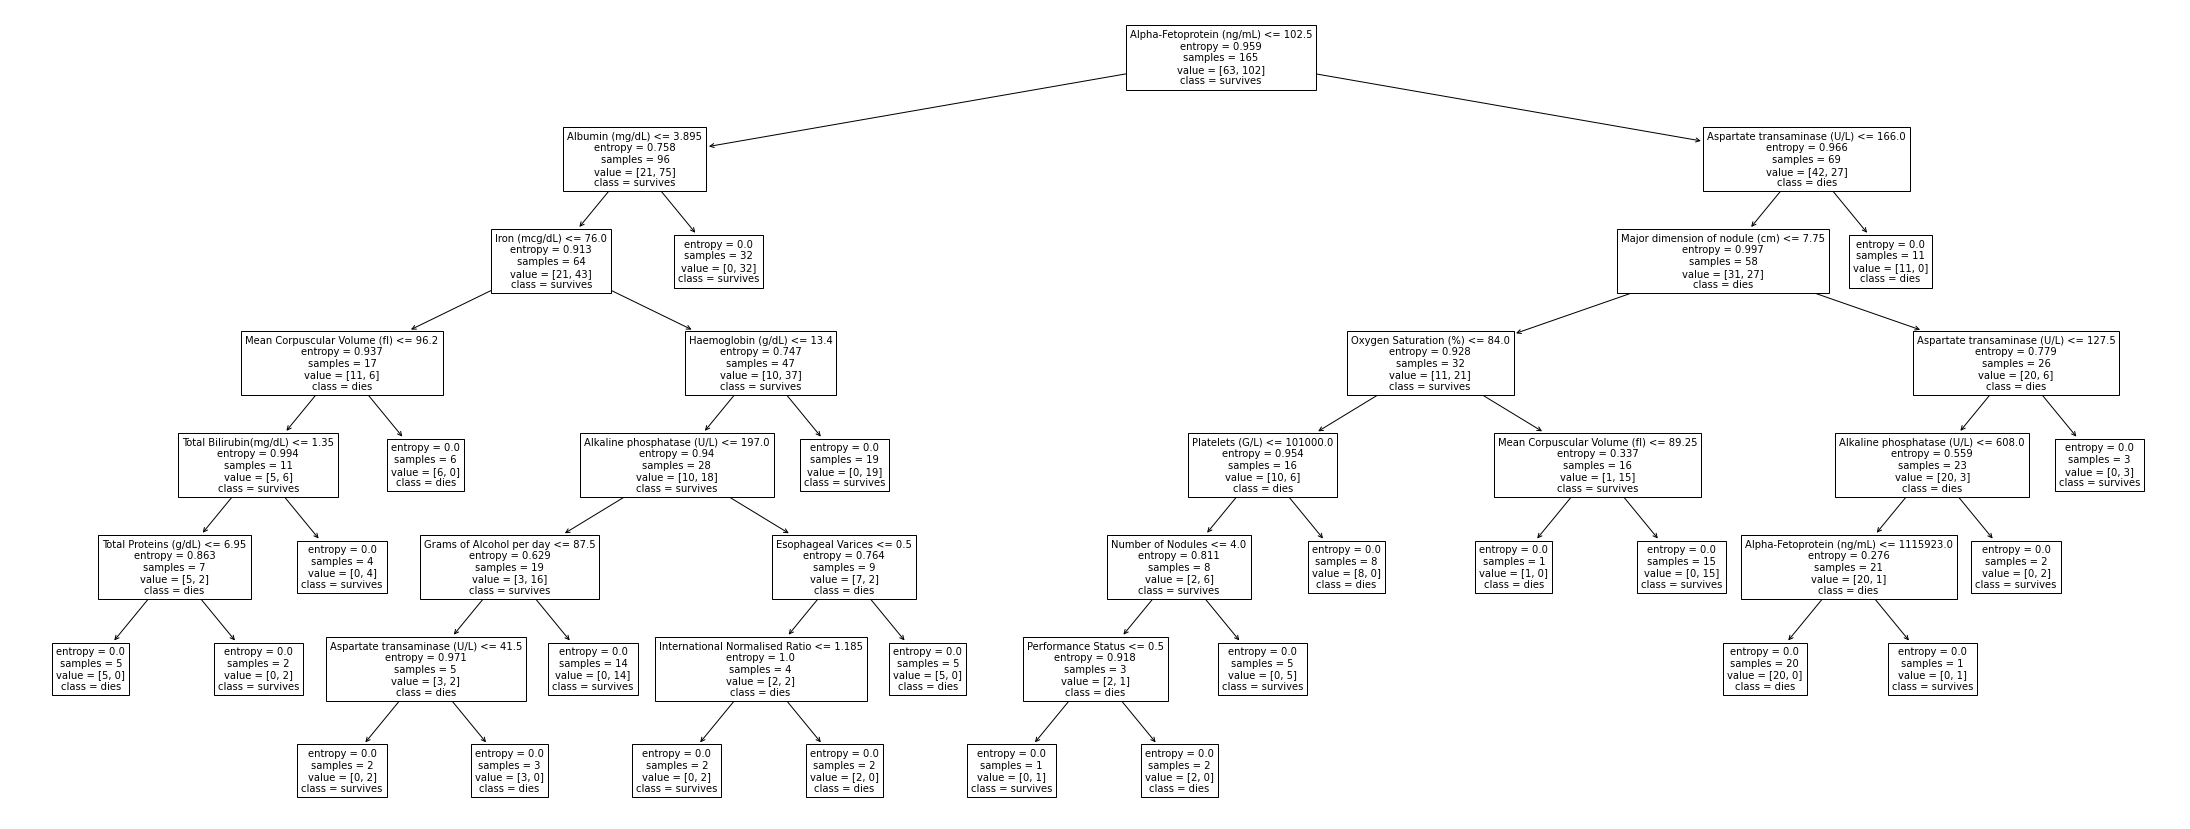

In [12]:
#loop through each feature and based on its handling strategy calculate the missing values (either median or mode of non-missing values)
#store missing value for each feature in an array

from sklearn.impute import SimpleImputer
from statistics import mode
from statistics import median
from sklearn import tree

all_feature_values = [[0 for i in range(165)] for i in range(50)]
for i in range(165):
    for j in range(50):
        all_feature_values[j][i] = record_info[i][j]
          
for i in range(50):
    if(handling_strategy[i] == "mode"):
        for j in range(165):
            if(all_feature_values[i][j] == '?'):
                all_feature_values[i][j] = mode(all_feature_values[i])
    
    else:
        for j in range(165):
            if(all_feature_values[i][j] == '?'):
                all_feature_values[i][j] = median(all_feature_values[i])
                
for i in range(50):
    for j in range(165):
        record_info[j][i] = all_feature_values[i][j]
        
class_labels = [0 for i in range(165)]
training_samples = [[0 for i in range(49)] for i in range(165)]
for i in range(165):
    for j in range(49):
        training_samples[i][j] = record_info[i][j]
        
for i in range(165):
    class_labels[i] = record_info[i][49]

    
clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf = clf.fit(training_samples, class_labels)
        
plt.figure(figsize=(39,15))  # set plot size (denoted in inches)
tree.plot_tree(clf, feature_names = headers, class_names = ["dies", "survives"], fontsize=10)
plt.show()  

           